<a href="https://colab.research.google.com/github/mariatozi/codigos-estudos/blob/main/Lideran%C3%A7as.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import openpyxl
import warnings
import seaborn as sns
from matplotlib import pyplot as plt

warnings.filterwarnings("ignore", category=UserWarning, message="Slicer List extension is not supported")


In [57]:
df = pd.read_excel('dados-lideranças.xlsx')

In [58]:
df.head()

,Chamado,Mês,Solicitante,Tipo de Problema,Retorno,Dia Abertura
0,R-1408161,julho,Wadislene Silva,Ligação caindo ou muda,Encerrado,2023-07-18
1,R-1407861,julho,Ana Ramos,Detalhado tabulador,Encerrado,2023-07-18
2,R-1407905,julho,Thauanna Andrade,Ligação caindo ou muda,Encerrado,2023-07-18
3,R-1408167,julho,Ana Marco,Ligação caindo ou muda,Encerrado,2023-07-18
4,R-1413414,julho,Tayana Silva,Falha login agente,Encerrado,2023-07-24


In [59]:
# Contar a frequência de valores em uma coluna

contagem_valores = df['Solicitante '].value_counts().head(5)
print(contagem_valores)

Wadislene Silva    22
Natalia Lima       22
Ana Marco          21
Anne Santos        18
Carmem Lapa        16
Name: Solicitante , dtype: int64


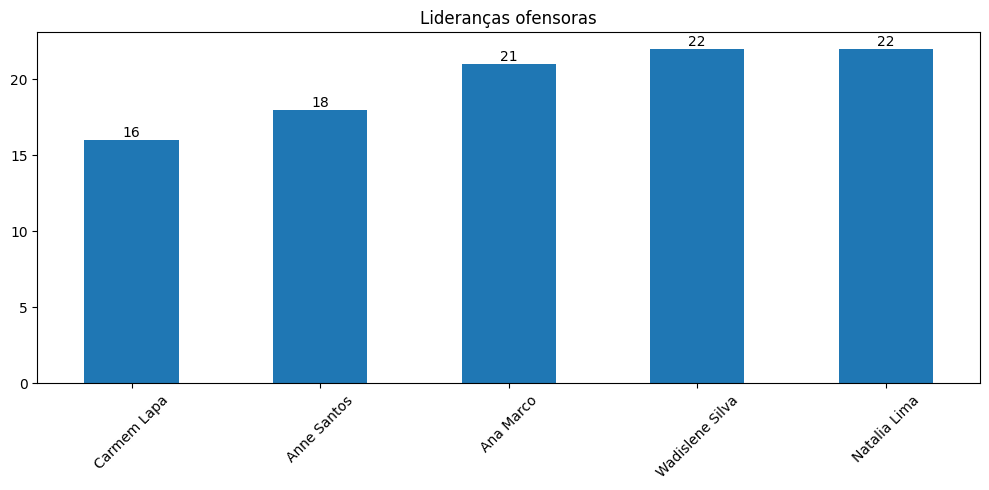

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o arquivo Excel em um DataFrame
caminho_arquivo = 'dados-julho.xlsx'
df = pd.read_excel('dados-lideranças.xlsx')

# Selecionar a coluna com informações ofensivas
coluna_ofensiva = 'Solicitante '  # Substitua pelo nome correto da coluna com informações ofensivas
df_ofensas = df[coluna_ofensiva]

# Contar a frequência das informações ofensivas
contagem_ofensas = df_ofensas.value_counts().head(5)

# Criar um gráfico de barras verticais para os 10 registros mais ofensores
plt.figure(figsize=(10, 5))
ax = contagem_ofensas.sort_values().plot(kind='bar')
plt.title('Lideranças ofensoras')

# Adicionar rótulos de dados nas barras do gráfico
ax.bar_label(ax.containers[0])

plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x para facilitar a leitura
plt.tight_layout()  # Ajustar layout para evitar cortes de texto
plt.show()

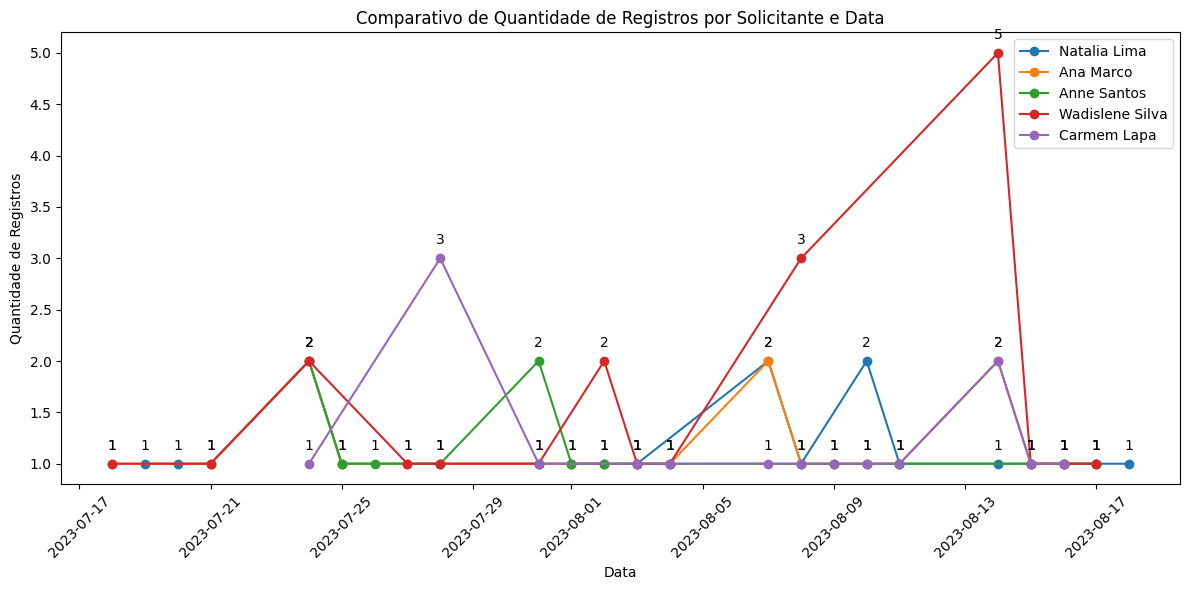

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o arquivo Excel em um DataFrame
caminho_arquivo = 'dados-lideranças.xlsx'
df = pd.read_excel(caminho_arquivo)

# Agrupar por Solicitante e Data e contar a quantidade de registros
agrupado = df.groupby(['Solicitante ', 'Dia Abertura']).size().reset_index(name='Quantidade')

# Selecionar um número limitado de nomes ofensores para exibir no gráfico
num_nomes_limitados = 5  # Substitua pelo número desejado de nomes a serem exibidos
solicitantes = agrupado['Solicitante '].value_counts().head(num_nomes_limitados).index

plt.figure(figsize=(12, 6))

for solicitante in solicitantes:
    data_solicitante = agrupado[agrupado['Solicitante '] == solicitante]
    plt.plot(data_solicitante['Dia Abertura'], data_solicitante['Quantidade'], label=solicitante, marker='o')

    # Adicionar rótulos de dados nas barras
    for x, y in zip(data_solicitante['Dia Abertura'], data_solicitante['Quantidade']):
        plt.annotate(f'{y}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('Data')
plt.ylabel('Quantidade de Registros')
plt.title('Comparativo de Quantidade de Registros por Solicitante e Data')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

plt.show()



In [62]:
# Carregar o arquivo Excel em um DataFrame
caminho_arquivo = 'dados-lideranças.xlsx'
df = pd.read_excel(caminho_arquivo)

# Agrupar por Solicitante e Data e contar a quantidade de registros
agrupado = df.groupby(['Solicitante ', 'Dia Abertura']).size().reset_index(name='Quantidade')

# Ordenar o DataFrame pelo volume de solicitações em ordem decrescente
agrupado_ordenado = agrupado.sort_values(by='Quantidade', ascending=False)

# Exibir o DataFrame ordenado
print(agrupado_ordenado)

          Solicitante  Dia Abertura  Quantidade
129    Wadislene Silva   2023-08-14           5
37         Carmem Lapa   2023-07-28           3
128    Wadislene Silva   2023-08-08           3
67   Gabriela Venancio   2023-08-07           2
14           Ana Marco   2023-08-14           2
..                 ...          ...         ...
43         Carmem Lapa   2023-08-09           1
42         Carmem Lapa   2023-08-08           1
41         Carmem Lapa   2023-08-07           1
40         Carmem Lapa   2023-08-04           1
133       natalia Lima   2023-08-04           1

[134 rows x 3 columns]


In [63]:
agrupado_ordenado.head(20)

,Solicitante,Dia Abertura,Quantidade
129,Wadislene Silva,2023-08-14,5
37,Carmem Lapa,2023-07-28,3
128,Wadislene Silva,2023-08-08,3
67,Gabriela Venancio,2023-08-07,2
14,Ana Marco,2023-08-14,2
96,Natalia Lima,2023-08-10,2
46,Carmem Lapa,2023-08-14,2
71,Gabriela Venancio,2023-08-14,2
94,Natalia Lima,2023-08-07,2
87,Natalia Lima,2023-07-24,2


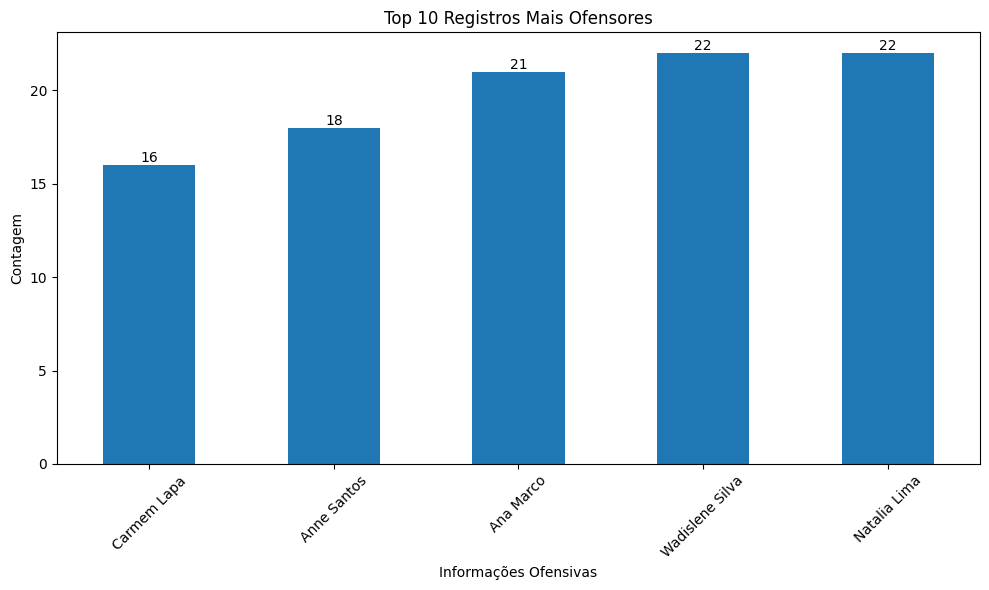

In [64]:
# Carregar o arquivo Excel em um DataFrame
caminho_arquivo = 'dados-lideranças.xlsx'
df = pd.read_excel('dados-lideranças.xlsx')

# Selecionar a coluna com informações ofensivas
coluna_ofensiva = 'Solicitante '  # Substitua pelo nome correto da coluna com informações ofensivas
df_ofensas = df[coluna_ofensiva]

# Contar a frequência das informações ofensivas
contagem_ofensas = df_ofensas.value_counts().head(5)

# Criar um gráfico de barras verticais para os 10 registros mais ofensores
plt.figure(figsize=(10, 6))
ax = contagem_ofensas.sort_values().plot(kind='bar')
plt.ylabel('Contagem')
plt.xlabel('Informações Ofensivas')
plt.title('Top 10 Registros Mais Ofensores')

# Adicionar rótulos de dados nas barras do gráfico
ax.bar_label(ax.containers[0])

plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x para facilitar a leitura
plt.tight_layout()  # Ajustar layout para evitar cortes de texto
plt.show()


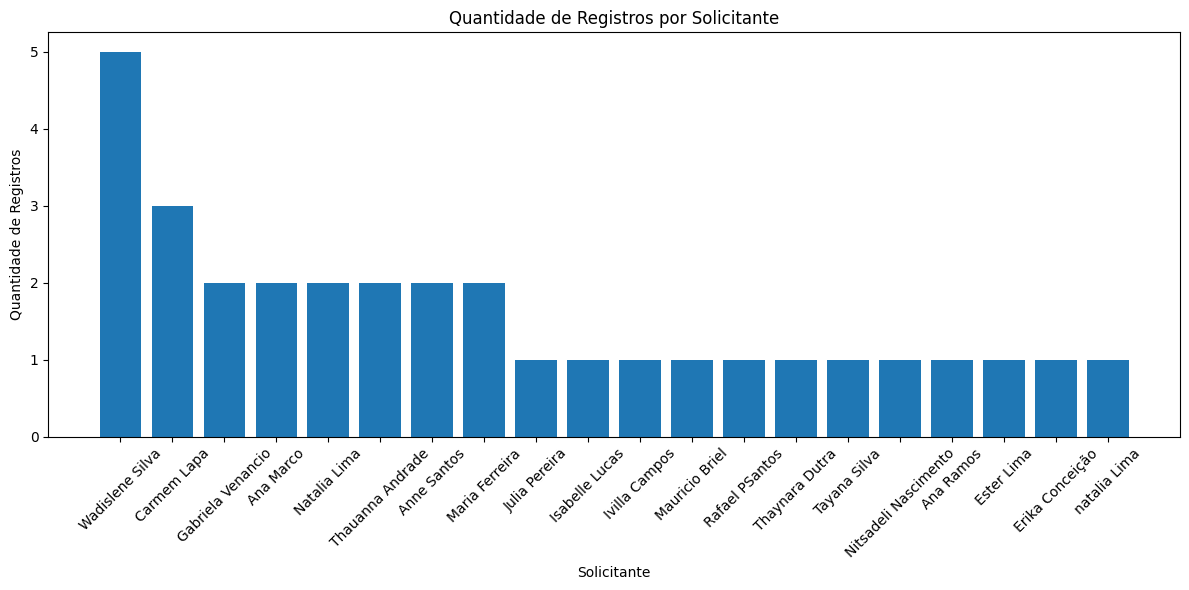

In [65]:
# Carregar o arquivo Excel em um DataFrame
caminho_arquivo = 'dados-lideranças.xlsx'
df = pd.read_excel(caminho_arquivo)

# Agrupar por Solicitante e Data e contar a quantidade de registros
agrupado = df.groupby(['Solicitante ', 'Dia Abertura']).size().reset_index(name='Quantidade')

# Ordenar o DataFrame pelo volume de solicitações em ordem decrescente
agrupado_ordenado = agrupado.sort_values(by='Quantidade', ascending=False)

# Criar um gráfico de barras com base no DataFrame ordenado
plt.figure(figsize=(12, 6))
plt.bar(agrupado_ordenado['Solicitante '], agrupado_ordenado['Quantidade'])
plt.xlabel('Solicitante')
plt.ylabel('Quantidade de Registros')
plt.title('Quantidade de Registros por Solicitante')
plt.xticks(rotation=45)
plt.tight_layout()

ax.bar_label(ax.containers[0])

plt.show()

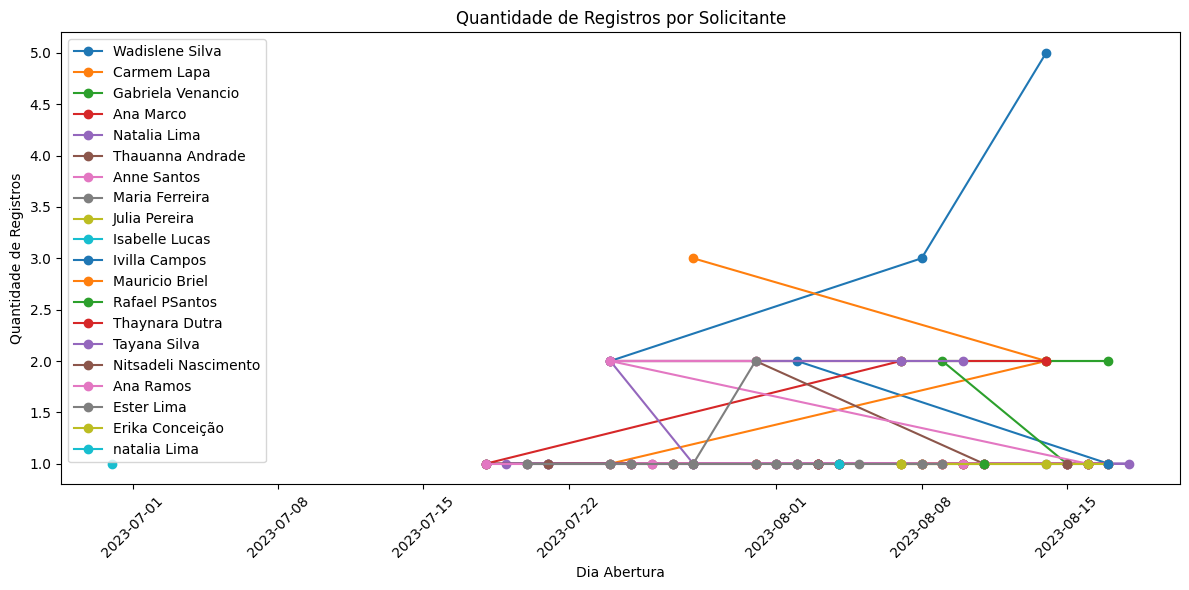

In [66]:
# Carregar o arquivo Excel em um DataFrame
caminho_arquivo = 'dados-lideranças.xlsx'
df = pd.read_excel(caminho_arquivo)

# Agrupar por Solicitante e Data e contar a quantidade de registros
agrupado = df.groupby(['Solicitante ', 'Dia Abertura']).size().reset_index(name='Quantidade')

# Ordenar o DataFrame pelo volume de solicitações em ordem decrescente
agrupado_ordenado = agrupado.sort_values(by='Quantidade', ascending=False)

# Criar um gráfico de linhas com base no DataFrame ordenado
plt.figure(figsize=(12, 6))
for solicitante in agrupado_ordenado['Solicitante '].unique():
    data_solicitante = agrupado_ordenado[agrupado_ordenado['Solicitante '] == solicitante]
    plt.plot(data_solicitante['Dia Abertura'], data_solicitante['Quantidade'], label=solicitante, marker='o')

plt.xlabel('Dia Abertura')
plt.ylabel('Quantidade de Registros')
plt.title('Quantidade de Registros por Solicitante')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

plt.show()

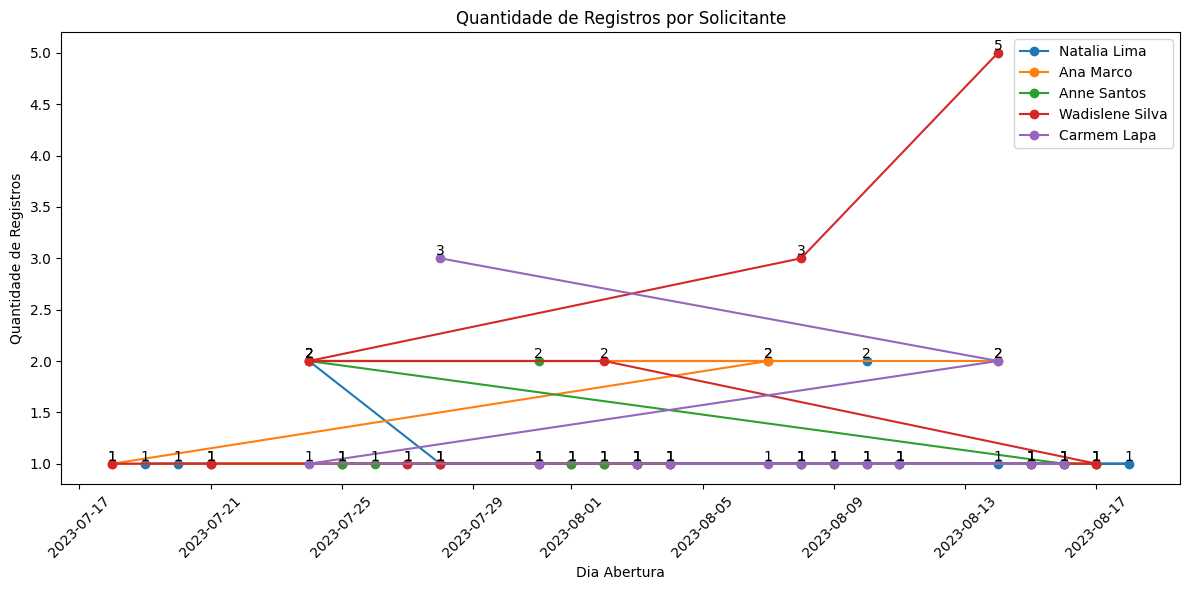

In [67]:
# Carregar o arquivo Excel em um DataFrame
caminho_arquivo = 'dados-lideranças.xlsx'
df = pd.read_excel(caminho_arquivo)

# Agrupar por Solicitante e Data e contar a quantidade de registros
agrupado = df.groupby(['Solicitante ', 'Dia Abertura']).size().reset_index(name='Quantidade')

# Ordenar o DataFrame pelo volume de solicitações em ordem decrescente
agrupado_ordenado = agrupado.sort_values(by='Quantidade', ascending=False)

# Selecionar os 5 maiores ofensores
num_ofensores = 5
solicitantes_ofensores = agrupado_ordenado['Solicitante '].value_counts().head(num_ofensores).index

# Criar um gráfico de linhas com base nos 5 maiores ofensores
plt.figure(figsize=(12, 6))
for solicitante in solicitantes_ofensores:
    data_solicitante = agrupado_ordenado[agrupado_ordenado['Solicitante '] == solicitante]
    plt.plot(data_solicitante['Dia Abertura'], data_solicitante['Quantidade'], label=solicitante, marker='o')

    # Adicionar rótulos de dados nas linhas
    for x, y in zip(data_solicitante['Dia Abertura'], data_solicitante['Quantidade']):
        plt.text(x, y, str(y), ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel('Dia Abertura')
plt.ylabel('Quantidade de Registros')
plt.title('Quantidade de Registros por Solicitante')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

plt.show()


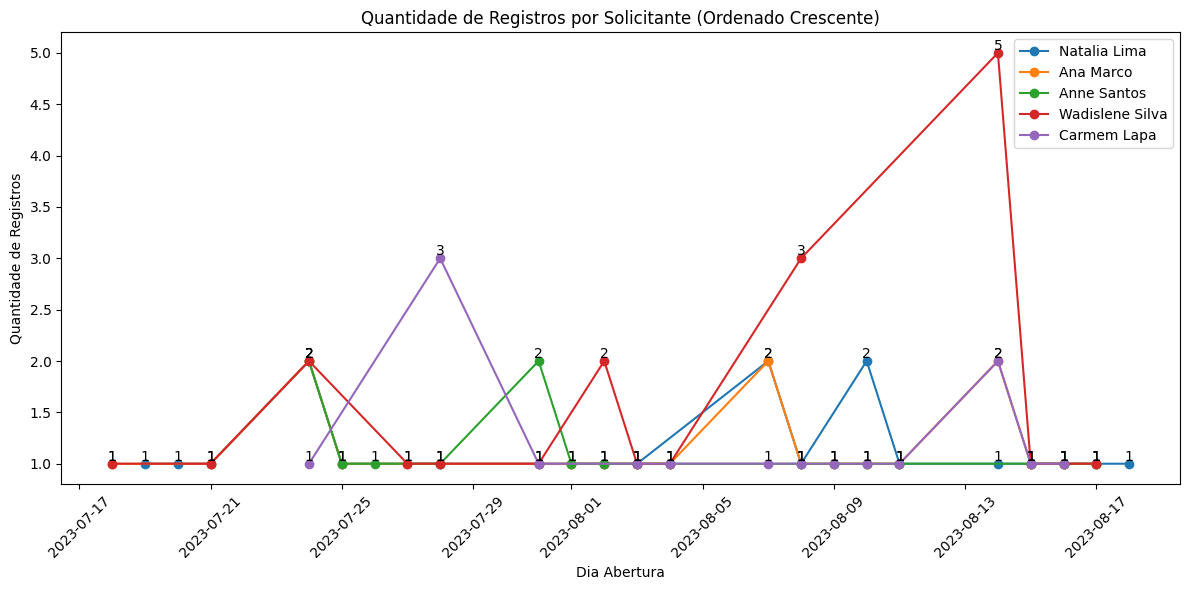

In [68]:
# Carregar o arquivo Excel em um DataFrame
caminho_arquivo = 'dados-lideranças.xlsx'
df = pd.read_excel(caminho_arquivo)

# Agrupar por Solicitante e Data e contar a quantidade de registros
agrupado = df.groupby(['Solicitante ', 'Dia Abertura']).size().reset_index(name='Quantidade')

# Ordenar o DataFrame pelo volume de solicitações em ordem crescente
agrupado_ordenado = agrupado.sort_values(by='Quantidade', ascending=True)

# Selecionar os 5 maiores ofensores
num_ofensores = 5
solicitantes_ofensores = agrupado_ordenado['Solicitante '].value_counts().head(num_ofensores).index

# Criar um gráfico de linhas com base nos 5 maiores ofensores ordenados
plt.figure(figsize=(12, 6))
for solicitante in solicitantes_ofensores:
    data_solicitante = agrupado[agrupado['Solicitante '] == solicitante]
    plt.plot(data_solicitante['Dia Abertura'], data_solicitante['Quantidade'], label=solicitante, marker='o')

    # Adicionar rótulos de dados nas linhas
    for x, y in zip(data_solicitante['Dia Abertura'], data_solicitante['Quantidade']):
        plt.text(x, y, str(y), ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel('Dia Abertura')
plt.ylabel('Quantidade de Registros')
plt.title('Quantidade de Registros por Solicitante (Ordenado Crescente)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

plt.show()


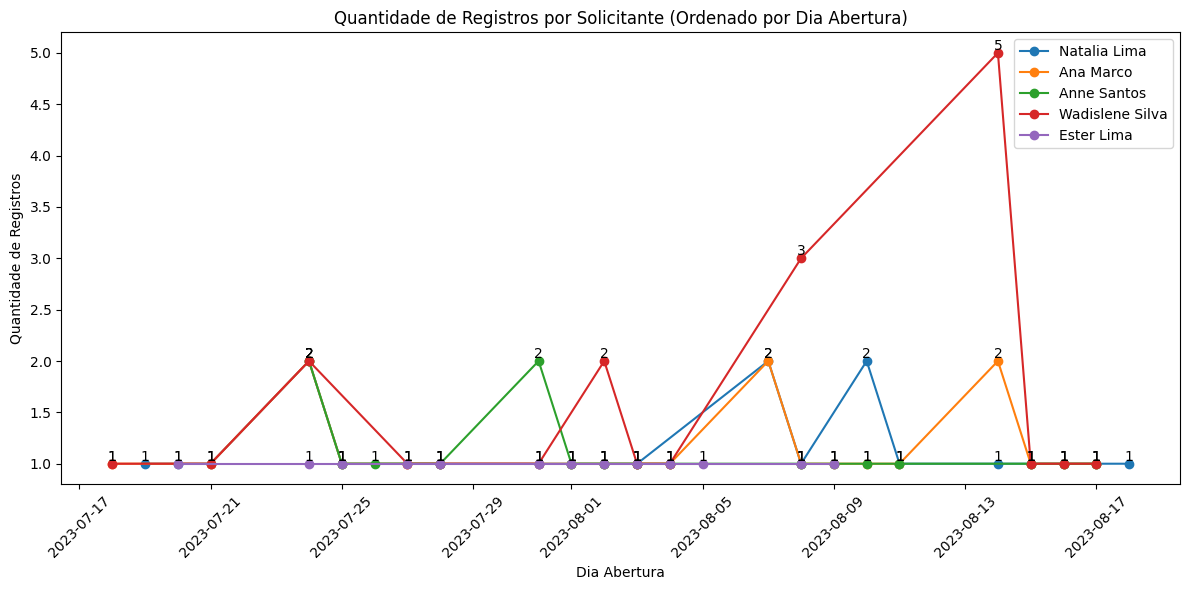

In [69]:
# Carregar o arquivo Excel em um DataFrame
caminho_arquivo = 'dados-lideranças.xlsx'
df = pd.read_excel(caminho_arquivo)

# Agrupar por Solicitante e Data e contar a quantidade de registros
agrupado = df.groupby(['Solicitante ', 'Dia Abertura']).size().reset_index(name='Quantidade')

# Ordenar o DataFrame pelo dia de abertura em ordem crescente
agrupado_ordenado = agrupado.sort_values(by='Dia Abertura', ascending=True)

# Selecionar os 5 maiores ofensores
num_ofensores = 5
solicitantes_ofensores = agrupado_ordenado['Solicitante '].value_counts().head(num_ofensores).index

# Criar um gráfico de linhas com base nos 5 maiores ofensores ordenados
plt.figure(figsize=(12, 6))
for solicitante in solicitantes_ofensores:
    data_solicitante = agrupado_ordenado[agrupado_ordenado['Solicitante '] == solicitante]
    plt.plot(data_solicitante['Dia Abertura'], data_solicitante['Quantidade'], label=solicitante, marker='o')

    # Adicionar rótulos de dados nas linhas
    for x, y in zip(data_solicitante['Dia Abertura'], data_solicitante['Quantidade']):
        plt.text(x, y, str(y), ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel('Dia Abertura')
plt.ylabel('Quantidade de Registros')
plt.title('Quantidade de Registros por Solicitante (Ordenado por Dia Abertura)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

plt.show()


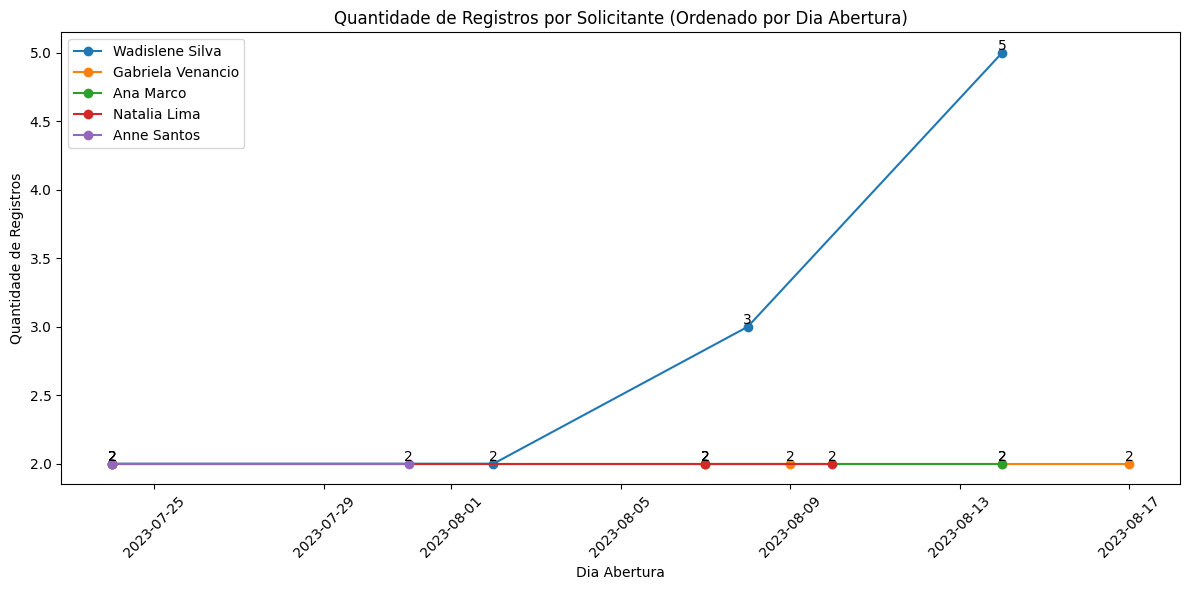

In [70]:
# Agrupar por Solicitante e Data e contar a quantidade de registros
agrupado = df.groupby(['Solicitante ', 'Dia Abertura']).size().reset_index(name='Quantidade')

# Filtrar registros com Quantidade acima de 1
agrupado_filtrado = agrupado[agrupado['Quantidade'] > 1]

# Ordenar o DataFrame filtrado pelo dia de abertura em ordem crescente
agrupado_ordenado = agrupado_filtrado.sort_values(by='Dia Abertura', ascending=True)

# Selecionar os 5 maiores ofensores
num_ofensores = 5
solicitantes_ofensores = agrupado_ordenado['Solicitante '].value_counts().head(num_ofensores).index

# Criar um gráfico de linhas com base nos 5 maiores ofensores ordenados
plt.figure(figsize=(12, 6))
for solicitante in solicitantes_ofensores:
    data_solicitante = agrupado_ordenado[agrupado_ordenado['Solicitante '] == solicitante]
    plt.plot(data_solicitante['Dia Abertura'], data_solicitante['Quantidade'], label=solicitante, marker='o')

    # Adicionar rótulos de dados nas linhas
    for x, y in zip(data_solicitante['Dia Abertura'], data_solicitante['Quantidade']):
        plt.text(x, y, str(y), ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel('Dia Abertura')
plt.ylabel('Quantidade de Registros')
plt.title('Quantidade de Registros por Solicitante (Ordenado por Dia Abertura)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

plt.show()


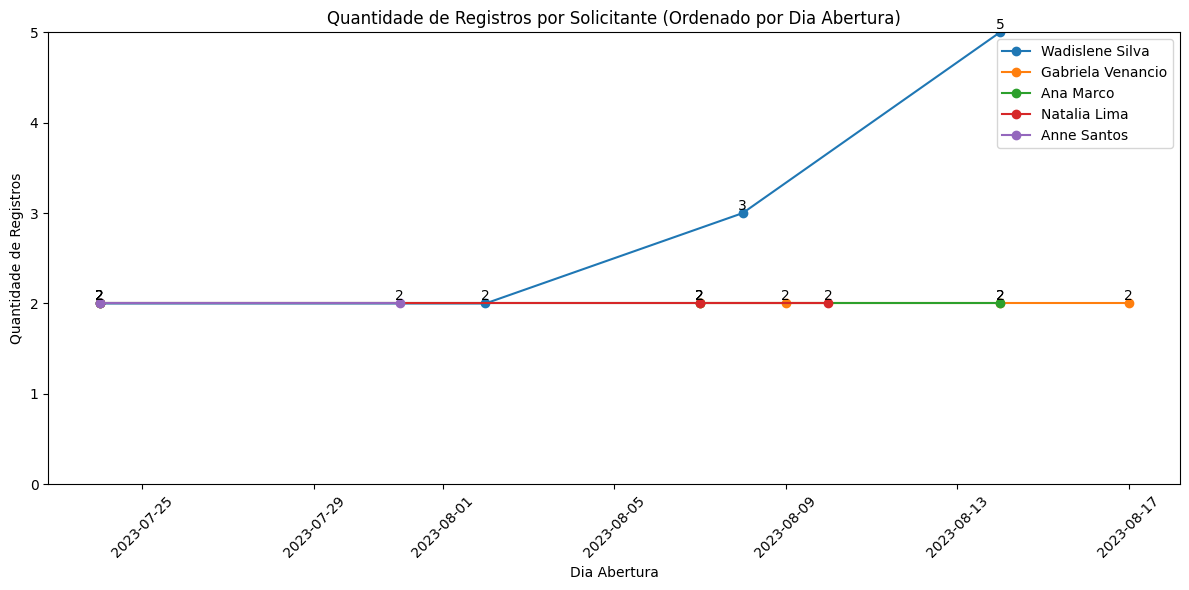

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o arquivo Excel em um DataFrame
caminho_arquivo = 'dados-lideranças.xlsx'
df = pd.read_excel(caminho_arquivo)

# Agrupar por Solicitante e Data e contar a quantidade de registros
agrupado = df.groupby(['Solicitante ', 'Dia Abertura']).size().reset_index(name='Quantidade')

# Filtrar registros com Quantidade acima de 1
agrupado_filtrado = agrupado[agrupado['Quantidade'] > 1]

# Ordenar o DataFrame filtrado pelo dia de abertura em ordem crescente
agrupado_ordenado = agrupado_filtrado.sort_values(by='Dia Abertura', ascending=True)

# Selecionar os 5 maiores ofensores
num_ofensores = 5
solicitantes_ofensores = agrupado_ordenado['Solicitante '].value_counts().head(num_ofensores).index

# Encontrar o valor máximo da quantidade
valor_maximo = agrupado_ordenado['Quantidade'].max()

# Criar um gráfico de linhas com base nos 5 maiores ofensores ordenados
plt.figure(figsize=(12, 6))
for solicitante in solicitantes_ofensores:
    data_solicitante = agrupado_ordenado[agrupado_ordenado['Solicitante '] == solicitante]
    plt.plot(data_solicitante['Dia Abertura'], data_solicitante['Quantidade'], label=solicitante, marker='o')

    # Adicionar rótulos de dados nas linhas
    for x, y in zip(data_solicitante['Dia Abertura'], data_solicitante['Quantidade']):
        plt.text(x, y, str(y), ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel('Dia Abertura')
plt.ylabel('Quantidade de Registros')
plt.title('Quantidade de Registros por Solicitante (Ordenado por Dia Abertura)')
plt.xticks(rotation=45)
plt.ylim(0, valor_maximo)  # Definir o limite do eixo Y
plt.legend()
plt.tight_layout()

plt.show()
